<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/azure_openai_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal LLM using Azure OpenAI GPT-4V model for image reasoning

In this notebook, we show how to use **Azure** OpenAI GPT4V MultiModal LLM class/abstraction for image understanding/reasoning. For a more complete example, please visit [this notebook](https://github.com/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/openai_multi_modal.ipynb).

In [ ]:
%pip install llama-index-multi-modal-llms-azure-openai

In [ ]:
!pip install openai

## Prerequisites

1. Setup an Azure subscription - you can create one for free [here](https://azure.microsoft.com/en-us/free/cognitive-services/)
2. Apply for access to Azure OpenAI Service [here](https://customervoice.microsoft.com/Pages/ResponsePage.aspx?id=v4j5cvGGr0GRqy180BHbR7en2Ais5pxKtso_Pz4b1_xUOFA5Qk1UWDRBMjg0WFhPMkIzTzhKQ1dWNyQlQCN0PWcu) 
3. Create a resource in the Azure portal [here](https://portal.azure.com/?microsoft_azure_marketplace_ItemHideKey=microsoft_openai_tip#create/Microsoft.CognitiveServicesOpenAI)
4. Deploy a model in Azure OpenAI Studio [here](https://oai.azure.com/)


You can find more details in [this guide.](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal)

Note down the **"model name"** and **"deployment name"**, you'll need it when connecting to your LLM.

##  Use GPT4V to understand Images from URLs / base64

In [ ]:
import os

os.environ["AZURE_OPENAI_API_KEY"] = "<your-api-key>"
os.environ[
    "AZURE_OPENAI_ENDPOINT"
] = "https://<your-resource-name>.openai.azure.com/"
os.environ["OPENAI_API_VERSION"] = "2023-12-01-preview"

## Initialize `AzureOpenAIMultiModal` and Load Images from URLs

Unlike normal `OpenAI`, you need to pass a `engine` argument in addition to `model`. The `engine` is the name of your model deployment you selected in Azure OpenAI Studio.

In [ ]:
from llama_index.multi_modal_llms.azure_openai import AzureOpenAIMultiModal

In [ ]:
azure_openai_mm_llm = AzureOpenAIMultiModal(
    engine="gpt-4-vision-preview",
    api_version="2023-12-01-preview",
    model="gpt-4-vision-preview",
    max_new_tokens=300,
)

Alternatively, you can also skip setting environment variables, and pass the parameters in directly via constructor.

In [ ]:
azure_openai_mm_llm = AzureOpenAIMultiModal(
    azure_endpoint="https://<your-endpoint>.openai.azure.com",
    engine="gpt-4-vision-preview",
    api_version="2023-12-01-preview",
    model="gpt-4-vision-preview",
    max_new_tokens=300,
)

In [ ]:
import base64
import requests
from llama_index.core.schema import ImageDocument

image_url = "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg"

response = requests.get(image_url)
if response.status_code != 200:
    raise ValueError("Error: Could not retrieve image from URL.")
base64str = base64.b64encode(response.content).decode("utf-8")

image_document = ImageDocument(image=base64str, image_mimetype="image/jpeg")


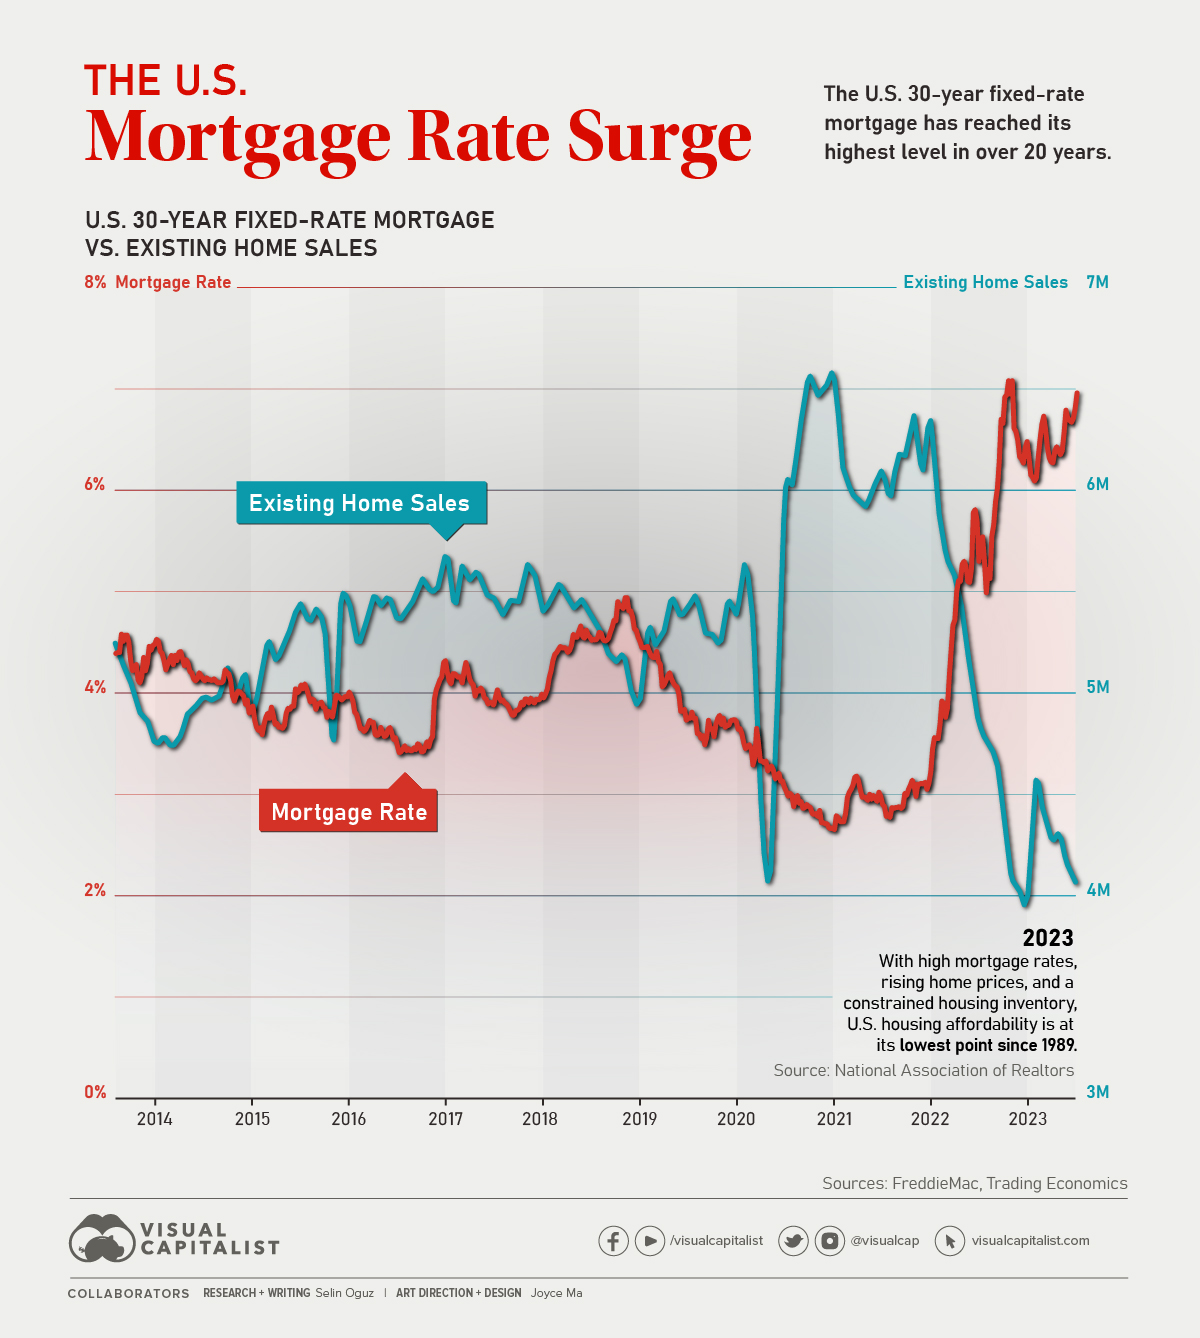

In [ ]:
from IPython.display import HTML

HTML(f'<img width=400 src="data:image/jpeg;base64,{base64str}"/>')

### Complete a prompt with an image

In [ ]:
complete_response = azure_openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=[image_document],
)

In [ ]:
print(complete_response)

The image is a line graph showing the U.S. 30-year fixed-rate mortgage percentage rate and existing home sales from 2015 to 2021. The mortgage rate is represented by a red line, while the home sales are represented by a blue line. The graph shows that the mortgage rate has reached its highest level in over 20 years, while home sales have fluctuated over the same period. There is also a note that the data is sourced from the U.S. Federal Reserve, Trading Economics, and Visual Capitalist.
